<a href="https://colab.research.google.com/github/ephantusGachomba/Stock-Price-Prediction-and-Forecasting/blob/main/Stock_Price_Prediction_and_Forecasting_using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [96]:
### Data Collection
import pandas_datareader as pdr
key="3c6c6fa7b193473be1bd9a94f1d0f3d0933443a0"

#Getting AAPL data using tiingo API
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [97]:
#Saving the data as csv file
df.to_csv('AAPL.csv')


# Pre-Processing the data

In [98]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
#Reviewing the collected dataset
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-10 00:00:00+00:00,98.83,99.3457,98.48,98.53,31712936,23.078134,23.198557,22.996404,23.008080,126851744,0.0,1.0
1,AAPL,2016-06-13 00:00:00+00:00,97.34,99.1200,97.10,98.69,38020494,22.730199,23.145853,22.674156,23.045442,152081976,0.0,1.0
2,AAPL,2016-06-14 00:00:00+00:00,97.46,98.4750,96.75,97.32,31931944,22.758221,22.995237,22.592426,22.725529,127727776,0.0,1.0
3,AAPL,2016-06-15 00:00:00+00:00,97.14,98.4100,97.03,97.82,29445227,22.683496,22.980058,22.657810,22.842285,117780908,0.0,1.0
4,AAPL,2016-06-16 00:00:00+00:00,97.55,97.7500,96.07,96.45,31326815,22.779237,22.825940,22.433637,22.522372,125307260,0.0,1.0


In [100]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-06-02 00:00:00+00:00,125.06,125.24,124.0500,124.28,59278862,125.06,125.24,124.0500,124.28,59278862,0.0,1.0
1253,AAPL,2021-06-03 00:00:00+00:00,123.54,124.85,123.1300,124.68,76229170,123.54,124.85,123.1300,124.68,76229170,0.0,1.0
1254,AAPL,2021-06-04 00:00:00+00:00,125.89,126.16,123.8500,124.07,75169343,125.89,126.16,123.8500,124.07,75169343,0.0,1.0
1255,AAPL,2021-06-07 00:00:00+00:00,125.90,126.32,124.8321,126.17,71057550,125.90,126.32,124.8321,126.17,71057550,0.0,1.0
1256,AAPL,2021-06-08 00:00:00+00:00,126.74,128.46,126.2101,126.60,74403774,126.74,128.46,126.2101,126.60,74403774,0.0,1.0


In [101]:
#Using the closing value to Analyse
df1 = df.reset_index()['close']
df1

0        98.83
1        97.34
2        97.46
3        97.14
4        97.55
         ...  
1252    125.06
1253    123.54
1254    125.89
1255    125.90
1256    126.74
Name: close, Length: 1257, dtype: float64

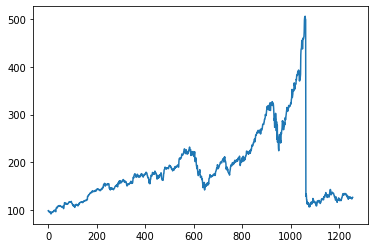

In [102]:
plt.plot(df1)

In [103]:
## LSTM are sensitive to the scale of the data. so we apply minimax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
#Splitting the dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data , test_data = df1[0:training_size, :], df1[training_size:, :1]

In [105]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [106]:
#Reshape into X = t, t+1, t+2, t+3 Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [107]:
X_train

array([[0.01639899, 0.01280039, 0.01309021, ..., 0.05419635, 0.05236083,
        0.0519261 ],
       [0.01280039, 0.01309021, 0.01231735, ..., 0.05236083, 0.0519261 ,
        0.046975  ],
       [0.01309021, 0.01231735, 0.01330757, ..., 0.0519261 , 0.046975  ,
        0.04721652],
       ...,
       [0.25820553, 0.25801232, 0.25888178, ..., 0.28250211, 0.28185002,
        0.27450791],
       [0.25801232, 0.25888178, 0.25893008, ..., 0.28185002, 0.27450791,
        0.28293684],
       [0.25888178, 0.25893008, 0.26830093, ..., 0.27450791, 0.28293684,
        0.29281488]])

In [108]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [109]:
#Create the LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [110]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 268ms/step - loss: 0.0135 - val_loss: 0.0330
Epoch 2/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0023 - val_loss: 0.0240
Epoch 3/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0013 - val_loss: 0.0232
Epoch 4/100
12/12 [==============================] - 2s 171ms/step - loss: 7.2853e-04 - val_loss: 0.0191
Epoch 5/100
12/12 [==============================] - 2s 172ms/step - loss: 4.1451e-04 - val_loss: 0.0205
Epoch 6/100
12/12 [==============================] - 2s 169ms/step - loss: 3.9852e-04 - val_loss: 0.0201
Epoch 7/100
12/12 [==============================] - 2s 174ms/step - loss: 3.7712e-04 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 2s 169ms/step - loss: 3.5914e-04 - val_loss: 0.0180
Epoch 9/100
12/12 [==============================] - 2s 176ms/step - loss: 3.4980e-04 - val_loss: 0.0179
Epoch 10/100
12/12 [==============================] - 2s 176ms/step

In [113]:
tf.__version__

'2.5.0'

In [114]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [115]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [116]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

173.76355245532903

In [117]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

247.03086410458985

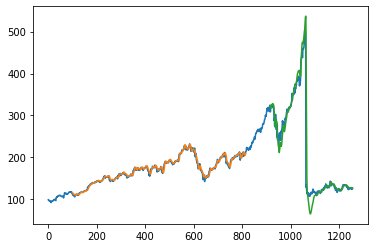

In [121]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()